## Introduction

The following notebook demonstrates an implementation of a lane finding algorithm. 
The process can be divided into the following main steps: 
1. Camera Lense Calibration and Distortion Correction
2. Edge Detection with Color and Gradient Thresholding
3. Perspective Transformation
4. Determination of Lane Lines 
5. Measure road curvature and Vehicle Location


In [2]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import glob 

### 1. Camera Lense Calibration and Distortion Correction

A collection of images are read in, which are used for the calibration. Chessboard images are the most useful for this because it is simple to locate the corners in grayscaled images of the chessboards.
Several cv2 methods are useful for the generation of undistorted images. 
These methods (with their inputs and outputs where applicable) include: 
> ret, corners = **cv2.findChessboardCorners**(img, pattern_size) 
> if ret; draw corners, else red circle: **cv2.drawChessboardCorners**(img, pattern_size, corners, ret)
> ret, mtx, dist, rvecs, tvecs = **cv2.calibrateCamera**(objpoints, imgpoints, img_shape, None, None)
> undist = **cv2.undistort**(img, mtx, dist, None, mtx)

The steps required are: 
1. Create an array of object points (which will be the same for each of the images used in the calibration process 
2. Create an array of image points, from each of the images used in the calibration process. These camera points are found by 
3. 


done


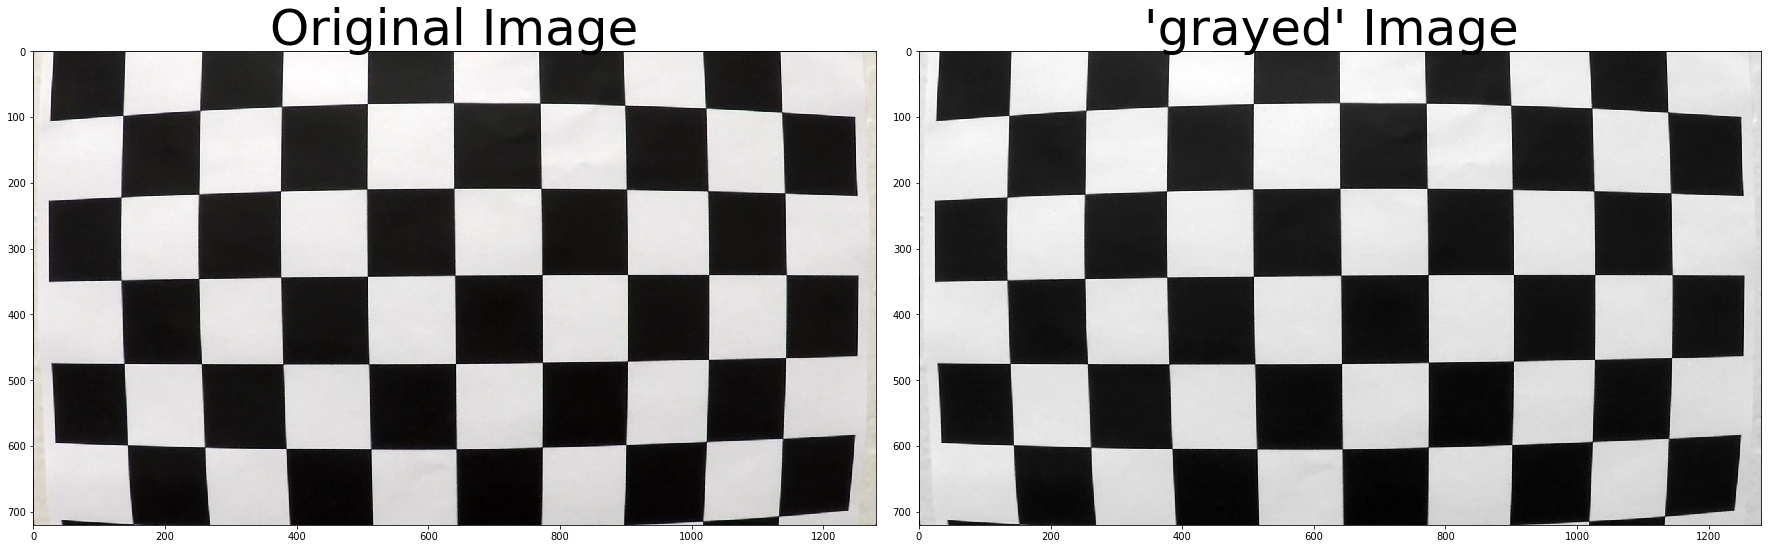

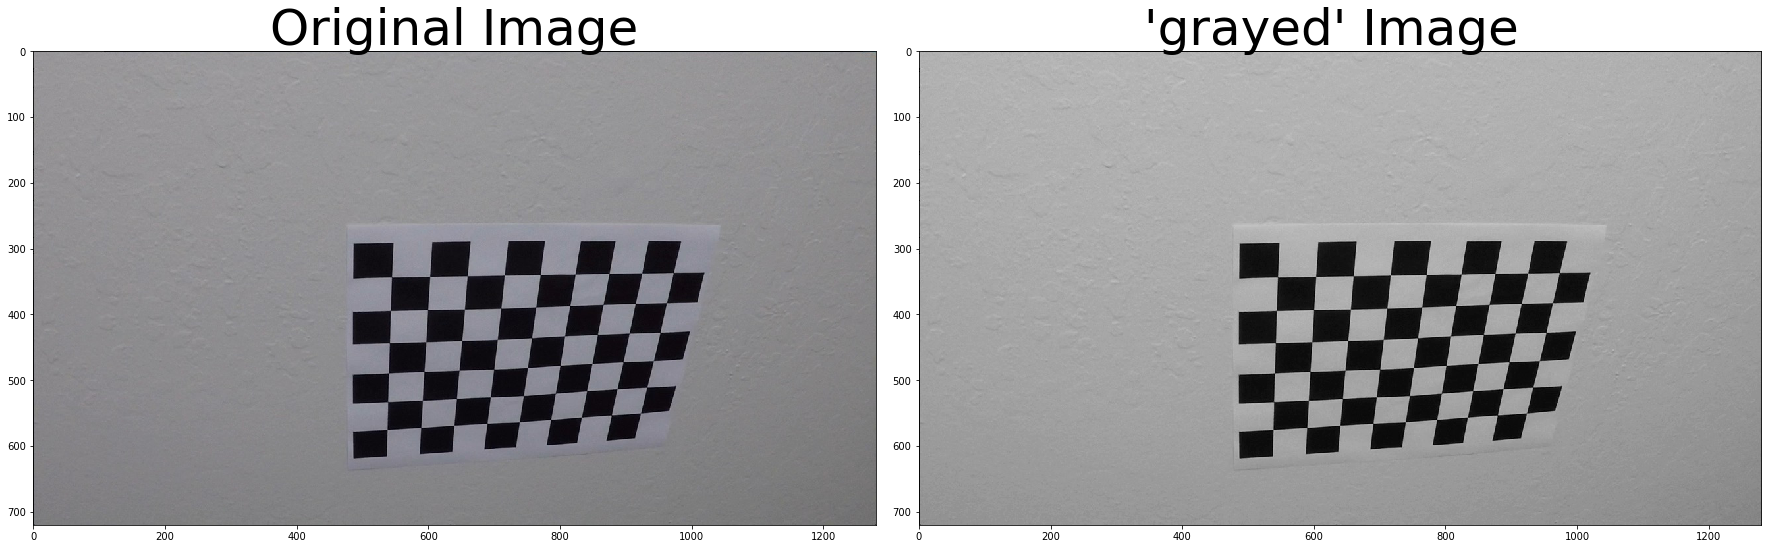

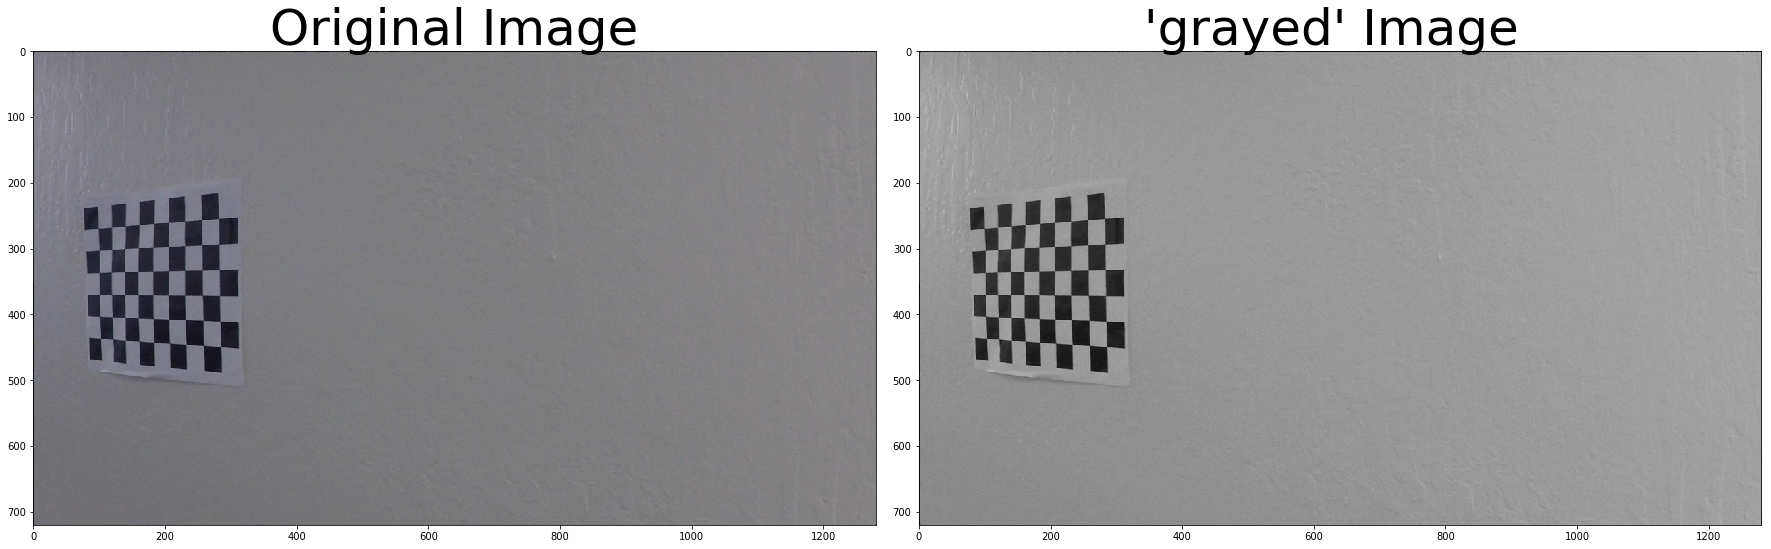

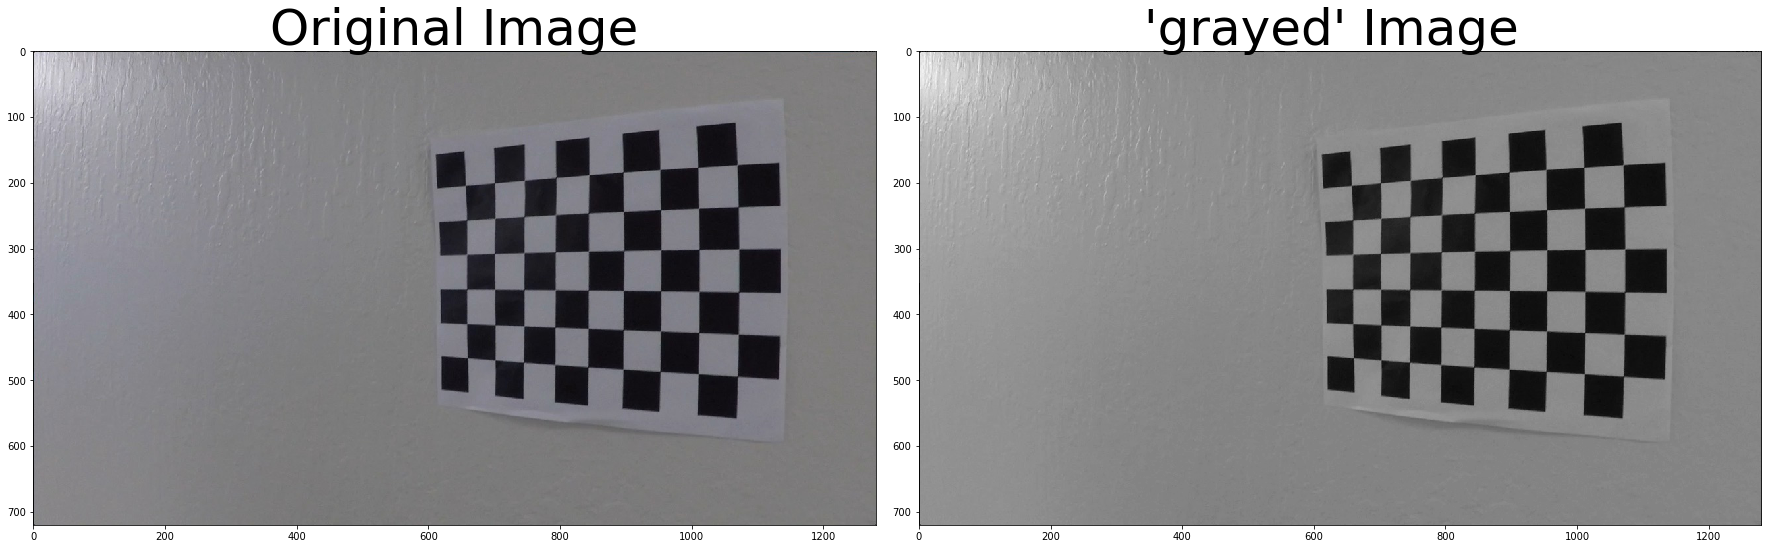

In [12]:
%matplotlib inline
images = glob.glob('../camera_cal/calibration*.jpg')
for fname in images[:4]:
    img = mpimg.imread(fname)
    plt.figure()
    #plt.imshow(img)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    '''gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    img = cv2.drawChessboardCorners(img, (9, 6), corners, ret)'''
    #plt.imshow(gray, cmap = 'gray')
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(gray, cmap='gray')
    ax2.set_title('\'grayed\' Image ', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

print("done")

In [ ]:
images = glob.glob('../camera_cal/calibration*.jpg')

objpoints = []
imgpoints = []


objp = np.zeros((6*9,3), np.float32)
objp.[:,:2] = np.mgrid[0:9, 0:6]
for fname in images:
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    
    if ret == True: 
        impoints.append(corners)
        objpoints.append(objp)
        
        img = cv2.drawChessboardCorners(img, (9, 6), corners, ret)
        
        